In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hotels = pd.read_excel("../data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Bar Chart and Histogram

* Build a histogram of lodging revenue with Seaborn. Filter your data to rows where LodgingRevenue is less than 1500. 
* Then, build a horizontal bar chart plotting the average room nights stayed for our top 5 countries by revenue ("DEU", "FRA", "PRT", "GBR", "ESP"). Change the color palette.

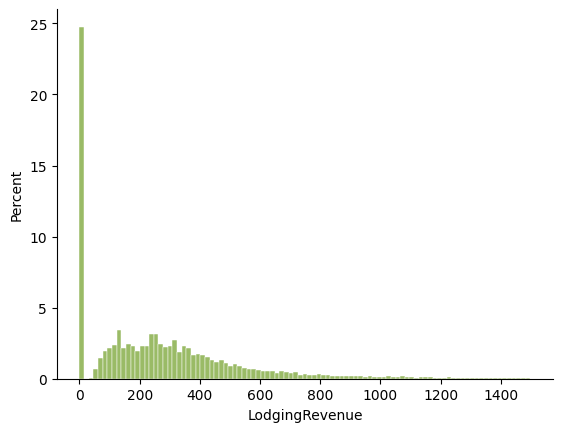

In [ ]:
sns.histplot(
    x = "LodgingRevenue",
    data = hotels.query("LodgingRevenue < 1500"),
    stat = "percent",
    color = "#88B04B",
    edgecolor = "white",
    alpha = 0.85
)

sns.despine() # Remove top and right borders

In [86]:
# top5_countries = (
#     hotels.loc[hotels["Nationality"].isin(["DEU", "FRA", "PRT", "GBR", "ESP"])]
#     .groupby("Nationality")
#     .agg(ave_room_nights = ("RoomNights", "mean"))
#     .sort_values("ave_room_nights", ascending = False)
# )

# Let's write the query using the query language
top5_list = ["DEU", "FRA", "PRT", "GBR", "ESP"]

top5_countries = (
    hotels.query("Nationality in @top5_list")
    # .groupby("Nationality")
    # .agg(ave_room_nights = ("RoomNights", "mean"))
    # .sort_values("ave_room_nights", ascending = False)
    )


/var/folders/mv/y6dng09x31s7lvvx2x62hf1r0000gn/T/ipykernel_17523/2666083682.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


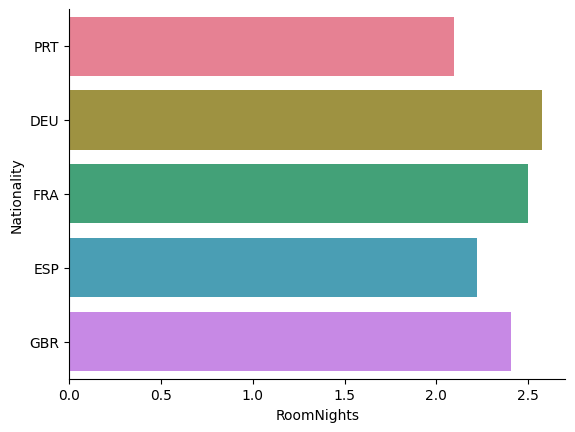

In [65]:
fig, ax = plt.subplots()

sns.barplot(
    x = "RoomNights",
    y = "Nationality",
    hue = "Nationality",
    data = top5_countries,
    ci = None,
    palette = "husl"
)

ax.set_xlabel("RoomNights")
sns.despine()

# Assignment 2: Box and Violin Plots

* Build a single boxplot of LodgingRevenue for our top 5 countries, where nightly revenue is less than 1500.
* Then, build a chart that has one violinplot for each country. Look at these plots both without a filter and with lodging revenue filtered to less than 1500.
* Finally, build a violinplot for the Age distribution for each of our top 5 countries.

<Axes: ylabel='LodgingRevenue'>

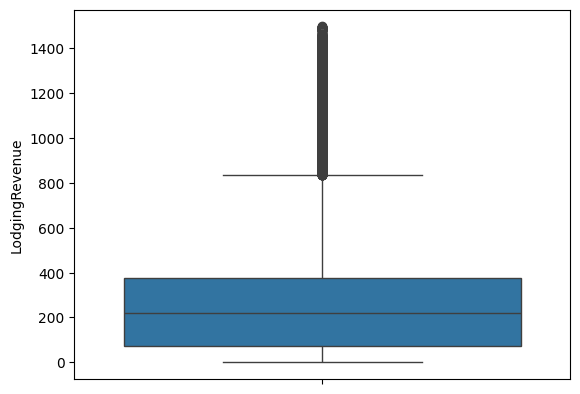

In [68]:
sns.boxplot(
    y = "LodgingRevenue",
    data = top5_countries.query("LodgingRevenue < 1500") 
)

<Axes: xlabel='Nationality', ylabel='LodgingRevenue'>

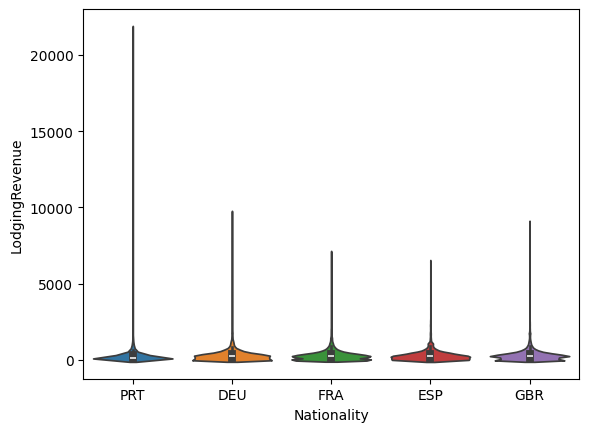

In [76]:
sns.violinplot(
    y = "LodgingRevenue",
    x = "Nationality",
    hue = "Nationality",
    data = top5_countries
)

<Axes: xlabel='Nationality', ylabel='LodgingRevenue'>

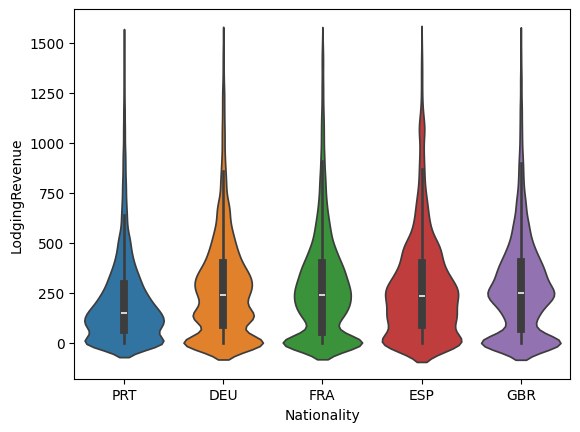

In [77]:
sns.violinplot(
    y = "LodgingRevenue",
    x = "Nationality",
    hue = "Nationality",
    data = top5_countries.query("LodgingRevenue < 1500") 
)

<Axes: xlabel='Nationality', ylabel='Age'>

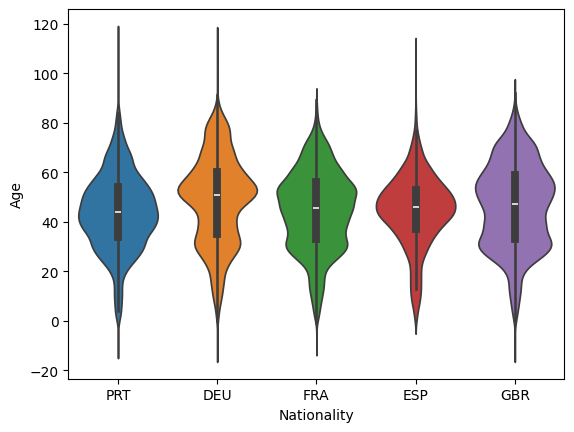

In [78]:
sns.violinplot(
    y = "Age",
    x = "Nationality",
    hue = "Nationality",
    data = top5_countries.query("LodgingRevenue < 1500") 
)

# Assigment 3: Linear Relationship Plots

* Build a plot with a regression line comparing LodgingRevenue as y and RoomNights as x for rows in our top 5 countries.
* Then, build the same chart in bullet 1 but with a separate line for each of our top 5 countries. Which country appears to pay the most per night?
* Finally, build a pairplot with the columns: Age, LodgingRevenue, OtherRevenue, PersonsNights, RoomNights, and DaysSinceLastStay

/Users/tim/Documents/Github/python_viz/.venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/tim/Documents/Github/python_viz/.venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/tim/Documents/Github/python_viz/.venv/lib/python3.13/site-packages/numpy/linalg/_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


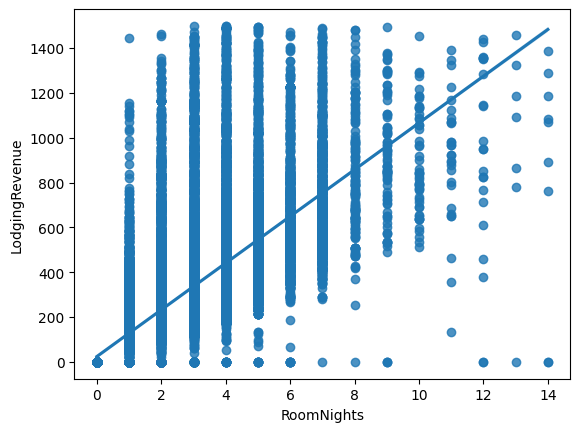

In [95]:
sns.regplot(
    x = "RoomNights",
    y = "LodgingRevenue", 
    data = top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15") 
);

In [98]:
sns.lmplot(
    x = "RoomNights",
    y = "LodgingRevenue", 
    data = top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15"),
    hue = "Nationality",
    x_jitter = 0.15, 
    alpha = 0.75
);

TypeError: lmplot() got an unexpected keyword argument 'alpha'

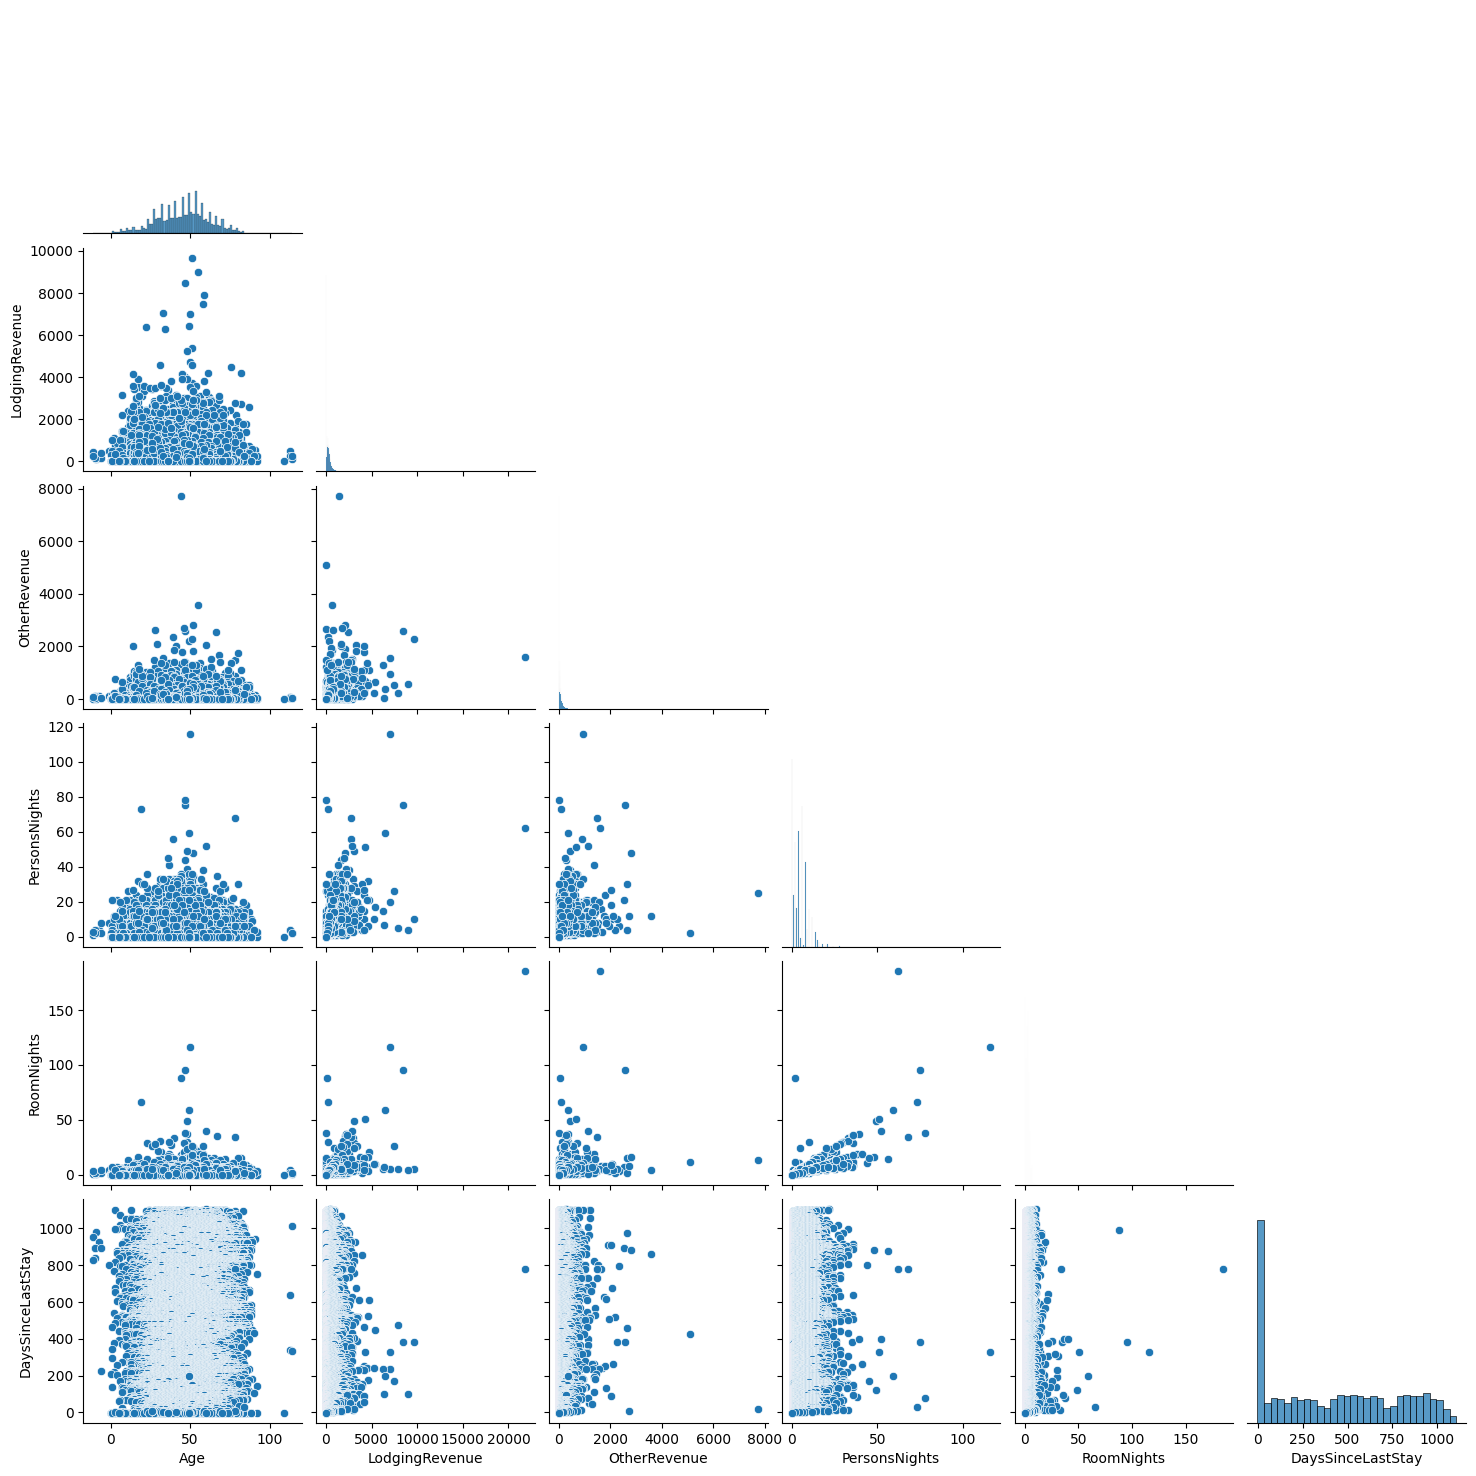

In [93]:
sns.pairplot(data=top5_countries.iloc[:, [2, 5, 6, 10, 11, 12]], corner = True)

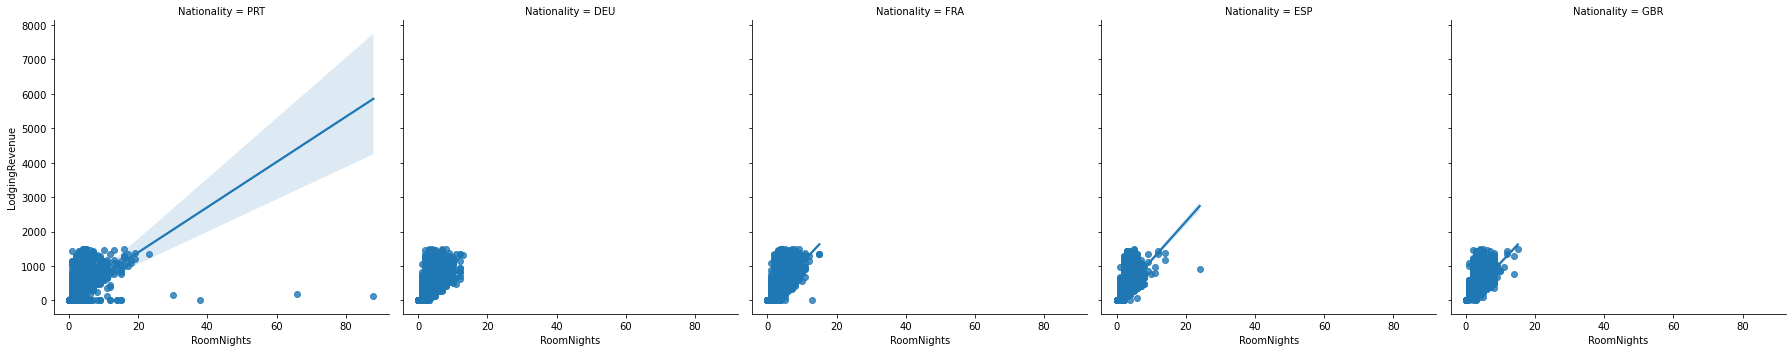

In [16]:
sns.lmplot(
    x="RoomNights",
    y="LodgingRevenue",
    col="Nationality",
    data=top5_countries.query("LodgingRevenue < 1500")
)

# Assignment 4 Heatmaps


* Using the top 5 countries DataFrame, Build a heatmap of Nationality as rows and MarketSegment as columns with the mean value of LodgingRevenue in each cell.

* Then, build a heatmap of the correlation matrix created when using the .corr() method on the hotels dataframe. Use the 'vlag' color palette.

In [100]:
mkt_segment = (
    top5_countries
    .pivot_table(
        index = "Nationality",
        columns = "MarketSegment",
        values = "LodgingRevenue",
        aggfunc = "mean"
    )
)
mkt_segment

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
Nationality,,,,,,,
DEU,586.100000,165.351111,286.381395,355.189467,293.921035,328.679177,234.815500
ESP,788.928571,0.000000,232.862384,321.377968,271.461086,314.819727,244.863591
FRA,637.000000,53.333333,280.838657,340.649577,230.373362,349.950256,202.730359
GBR,287.140000,84.150000,467.905287,351.774260,363.530552,309.845596,239.733048
PRT,434.535870,14.192343,276.862710,229.922979,234.751932,244.704767,233.157763


<Axes: xlabel='MarketSegment', ylabel='Nationality'>

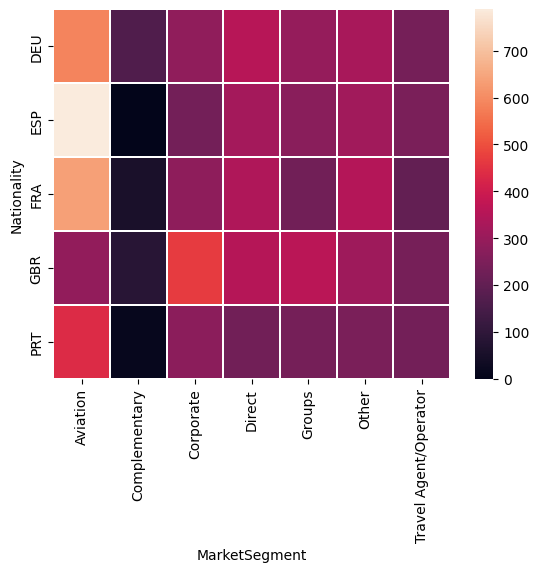

In [102]:
sns.heatmap(mkt_segment, linewidth = 0.01)

<Axes: >

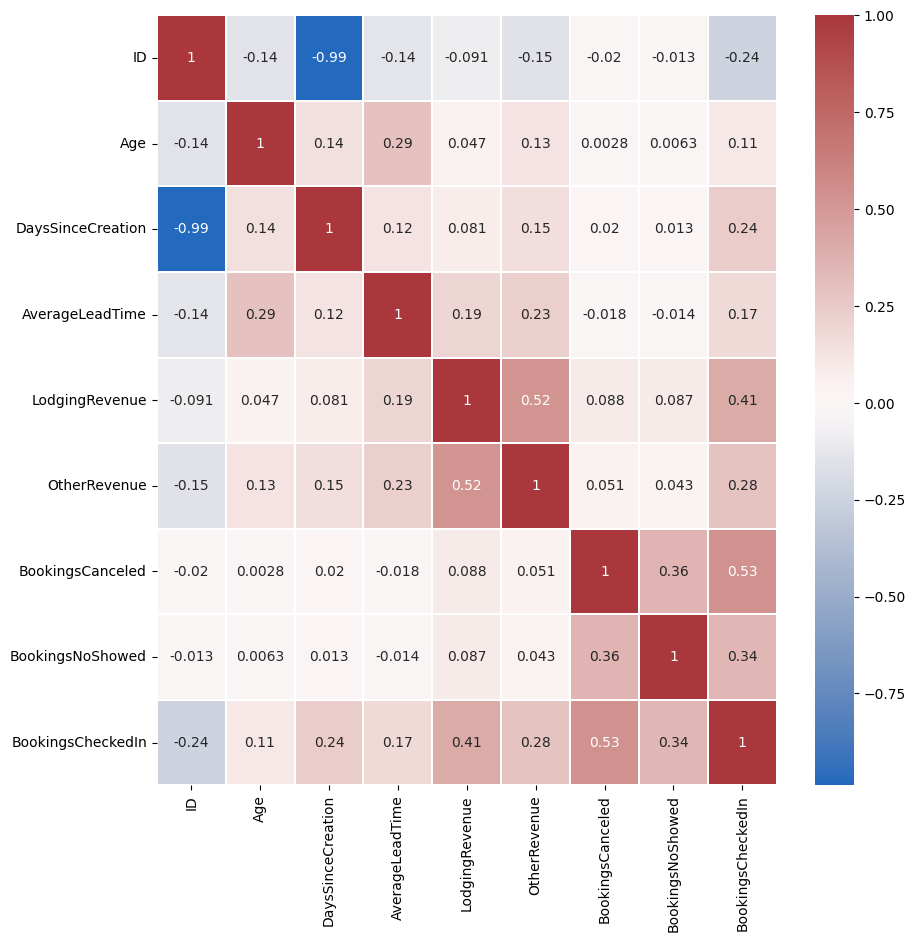

In [112]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(top5_countries.iloc[:, 0:10].select_dtypes(include='number').corr(), 
            linewidth = 0.01, 
            cmap = "vlag",
            annot = True)